# Red or Black
## Descrição
Red or Black é um jogo de cartas jogado por dois agentes, que possuem um baralho de $n$ cartas vermelhas e $n$ cartas pretas. Para fins de notação, usaremos $n=26$. O jogo se baseia nas tentativas dos agentes em acertar a cor da carta do topo do deck, e o jogo continua até que o baralho acabe.
## Estratégias dos agentes
É definido que a pontuação (score) é o número de chutes corretos que o agente conseguiu. Assim, a estratégia de um agente ingênuo (digamos, uma criança pequena, por exemplo), chamado Agente 1, é de chutar aleatóriamente a cor para cada carta. Seu score esperado, trivialmente, será de $26$. <br>
Porém, o agente mais velho, chamado Agente 2, como um bom matemático e ganancioso, sabe que pode contar cartas nesse jogo, e que chutar a cor a qual existem mais cartas restantes pode aumentar a probabilidade de acertar. Assim sua estratégia será exatamente essa, sempre chutará a cor que tiver mais cartas restantes.
## Problema
Qual é o valor esperado, denotado por $S(n)$, para um baralho de 52 cartas do agente velho? E para um baralho simétrico de $2n$ cartas?

## Game paths, Score esperado, e cruzamento de diagonais:
Podemos ver o jogo Red or Black como um caminho de $(n,n) \in \Z^2$ até $(0,0)$, sendo que a abscissa corresponde ao número de cartas restantes vermelhas e a ordenada, as cartas pretas restantes. Cada retirada de carta do topo é um passo no nosso gráfico, indo para esquerda quando retiramos uma carta vermelha ou para baixo quando retiramos uma preta, então, apenas um dos eixos é decrescentado a cada passo. Chamaremos esse caminho de $\textbf{Game Path}$ <br>
Vamos analisar a situação em que a primeira carta em $(n,n)$ aleatória é preta, isto é, o primeiro passo no gráfico é para baixo. Isso nos deixa na região abaixo do gráfico $x=y$, quando $Red > Black$, então, o agente 2 chutará vermelho $2k-1$ vezes até que chegue no ponto $(n-k, n-k)$. Portanto, seu score esperado $S_2(n)$ será $$S_2(n) = k+\frac{1}{2}$$
pois acertará exatamente $k$ vezes, e errará $k-1$ vezes, enquanto a primeira carta na diagonal é aleatória, e contribui em $0.5$ ao valor esperado. Obviamente, entre $(n,n)$ e $(n-k,n-k)$, o agente 1 terá:
$$ S_1(n) = k $$
até o ponto $(n-k,n-k)$. Veja que isso pode ocorrer toda vez que cruzamos a diagonal, ou seja, aumentamos em $0.5$ nosso $S_2(n)$ toda vez que passamos na diagonal. <br>
Apenas com isso, já poderíamos começar a simulação sabendo que o score esperado é maior que $26$, mas não sabemos ao certo qual é esse score.


[26, 26, 26, 25, 24, 24, 24, 23, 23, 23, 22, 21, 20, 19, 19, 19, 18, 17, 16, 15, 14, 13, 13, 13, 12, 11, 10, 9, 9, 9, 9, 8, 8, 7, 7, 7, 7, 7, 7, 6, 5, 4, 3, 3, 2, 2, 1, 0, 0, 0, 0, 0, 0]
[26, 25, 24, 24, 24, 23, 22, 22, 21, 20, 20, 20, 20, 20, 19, 18, 18, 18, 18, 18, 18, 18, 17, 16, 16, 16, 16, 16, 15, 14, 13, 13, 12, 12, 11, 10, 9, 8, 7, 7, 7, 7, 7, 6, 6, 5, 5, 5, 4, 3, 2, 1, 0]


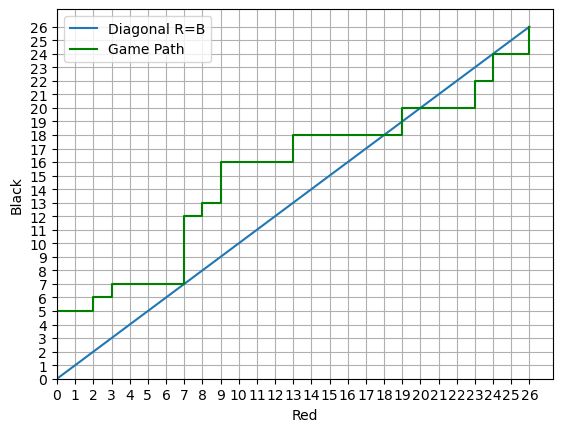

In [1]:
import matplotlib.pyplot as plt
import numpy as np

n = 26
x = np.linspace(0,n,n)
y = x
r=[n]
b=[n]
for step in range(n*2):
    choice = np.random.randint(0,2)
    if r[-1] == 0:
        choice = 1
    if b[-1] == 0:
        choice = 0
    if choice == 0:
        r.append(r[-1] - 1)
        b.append(b[-1])
    else:
        b.append(b[-1] - 1)
        r.append(r[-1])

print(r)

print(b)
plt.plot(x,y, label='Diagonal R=B')
plt.plot(r,b, color='green', label='Game Path')
plt.xlabel('Red')
plt.ylabel('Black')
plt.xlim(left=0)
plt.ylim(bottom=0)  

plt.yticks(range(27))
plt.xticks(range(27))
plt.grid(True)
plt.legend()
plt.show()


Seja $P$ o conjunto de todos os jogos possíveis, sabemos que o número de jogos é a escolha das posições das $n$ cartas vermelhas (ou pretas), então, existem $C(2n,n) = \binom{2n}{n} $ possíveis jogos. <br>
Seja $p$ um caminho qualquer, e $v(p)$ o número de diagonais visitadas por $p$. Dado $v(p)$, sabemos que o valor esperado $S(n)$ dado $p$, será $$S(n,p)=n+0,5(v(p)-1)$$ sendo que consideramos que $(0,0)$ é considerado uma visita a diagonal, mas não aumenta o score esperado. Portanto, o score esperado total é a soma do score de todos jogos divido pelos jogos totais:
$$ S_2(n) = \sum_{p\in P} \frac{n+0,5(v(p)-1)}{C(2n,n)} = n+0,5\left(\left(\sum_{p\in P}\frac{v(p)}{C(2n,n)}\right)-1\right)$$
isso transforma o problema em tentar achar o numero médio de visitas às diagonais, ou equivalentemente, o número total de visitas em todos game paths.

## Total de visitas diagonais
Seja $V(n)$ o número total de visitas diagonais em todos os jogos $p$ em $P$ $\chi$. Definimos:
$$ \chi (p,m) = 
\begin{cases}
    1 & \text{,se $p$ visita $(m,m)$} \\
    0 & \text{,caso contrário}
\end{cases}
$$
Então,
$$
V(n) = \sum_{p\in P} \left[ \sum_{m=0}^{n}\chi(p,m)\right]= \sum_{m=0}^{n}\left[ \sum_{p\in P}\chi(p,m)\right]=\\
= \sum_{m=0}^{n}\text{numero de caminhos que visitam $(m,m)$}\\
=\sum_{m=0}^{n}C(2m,m) \times C(2(n-m), (n-m))
$$
Intuitivamente, o número de caminho que passsam por $(m,m)$ é a soma dos caminhos que vao até $(m,m)$ e saem de $(m,m)$
## Cálculo de $V(n)$ e $S(n)$ 
#### 1) Lembrando:
- Série de Taylor:
$$
f(x) = \sum_{n=0}^{\infty}\frac{f^{(n)}(a)}{n!}(x-a)^n
$$
- Série Binomial, $|x|<0$
$$
(1+x)^k = \sum_{n=0}^{\infty}\binom{k}{n}(-x)^n
$$
- Função Geradora G(A,z) de uma sequência A:
$$
G(A;z) = \sum_{n=0}^{\infty}A(n)z^n
$$
Se $A(n) = ar^n \rightarrow G(A,z)=\frac{a}{1-rz}$ (Progressão Geométrica)
- Propriedade de G:
$$
G(A*B,z) = G(A,z) G(B,z)
$$
- Convolução de sequências:
$$
(A*B)(n)=\sum_{m=0}^{n}A(m)B(n-m)
$$
Com tudo isso, podemos finalmente avaliar $V(n)=\sum_{m=0}^{n}C(2m,m) \times C(2(n-m), (n-m))$<br>
A expansão de Taylor de $\frac{1}{\sqrt{1-4z}}$ é:
$$
\sum_{n=0}^{\infty}C(2n,n)z^n
$$
Seja $D(n)=C(2n,n)$, veja que
$$
V(n)=\sum_{m=0}^{n}C(2m,m) \times C(2(n-m), (n-m)) = D(n)*D(n)
$$
Se $G(V,z)$ estiver na forma de PG, e razoável pensar que $V(n)$ vai estar na forma de exponenciais.<br>
Mas se a Expansão de Taylor de $\frac{1}{\sqrt{1-4z}}$ é $\sum_{n=0}^{\infty}C(2n,n)z^n$, então a expansão é a própria $G(D,z)$<br>
Então $G(V,z)=G(D*D,z)=G(D,z)^2=\frac{1}{1-4z}$<br>
Portanto, $$V(n)=4^n$$
Isso nos leva ao problema inicial, em que 
$$
S(n) = n+0,5\left( \left(\frac{4^n}{C(2n,n)}\right)-1\right)
$$

Contudo, esse calculo pode ser custoso quando $n=26$, por isso, vamos utilizar a aproximação de $n!$ de Stirling's

$$
n! = \sqrt{2\pi n} (n/e)^n + O(\sqrt{2\pi /n}(n/e)^n)
$$

$$
S(n) = n+0,5\left( \left(\frac{4^n n!n!}{2n!}\right)-1\right)
$$

$$
S(n)=n+0,5(\sqrt{\pi n}-1) +O(1/\sqrt{n})
$$

Como $\lim_{n\to\infty}O(1/\sqrt{n}) =0$, temos, finalmente, a expressão analítica do score esperado:
$$
S(n) = n+0,5(\sqrt{\pi n}-1)
$$

Para $n=26$, $S(n)\approx 30,019$. Vamos testar se esse resultado é condizente.

In [49]:
def game(n):
    r=[n]
    b=[n]
    path = []
    for step in range(n*2):
        choice = np.random.randint(0,2)
        if r[-1] == 0:
            choice = 1
        if b[-1] == 0:
            choice = 0
        if choice == 0:
            r.append(r[-1] - 1)
            b.append(b[-1])
            path.append(choice)
        else:
            b.append(b[-1] - 1)
            r.append(r[-1])
            path.append(choice)
    return r,b, path

def agent_2_decision(r,b,path):
    import random
    s = 0

    # step = [0, 52]
    # r_index = [0,1, ... , 52]
    # r[52] = 0
    for step in range(len(r)-1):
        if r[step] > b[step]:
            choice = 0
        elif r[step] < b[step]:
            choice = 1
        else:
            choice = random.randint(0,1)
        if choice == path[step]:
            s += 1
    return s
def agent_1_decision(path):
    s = 0
    for step in range(len(path)):
        choice = np.random.randint(0,2)
        if choice == path[step]:
            s += 1
    return s

52
Agente 1:  25.998
Agente 2:  28.878


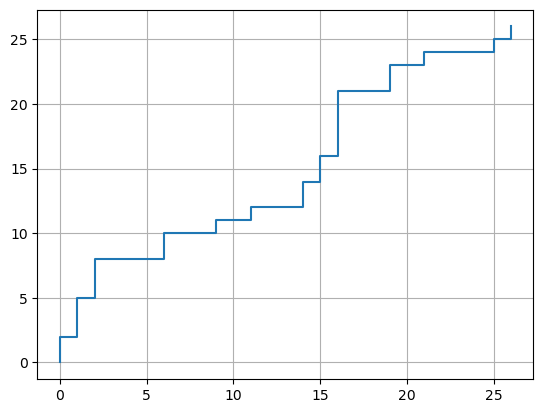

In [56]:
n = 26
score_1 = 0
score_2= 0
simulations = 1000

for g in range(simulations):
    r,b, path = game(n)
    score_1 += agent_1_decision(path)
    score_2 += agent_2_decision(r,b,path)
print(len(path))
plt.plot(r,b)
plt.grid(True)
print('Agente 1: ', score_1/simulations)
print('Agente 2: ', score_2/simulations)

Se não utilizarmos a aproximação de $n!$, e computá-lo na força bruta, veremos se o resultado é parecido:

In [33]:
import math

# calculo direto
c1 = math.comb(52,26)
S_n = 26 + 0.5*(4**26/c1 - 1)
print(S_n)

30.040664774713896
